# Problema 3. Combinar cifras y operaciones

- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(\*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

```plain
4+2-6/3\*1 = 4
```

- Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
  - ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
  - ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?
- Nota: Es posible usar la función de python “eval” para evaluar una expresión:

```python
expresion = '4-2+6/3*1
print(eval(expresion)) # 4.0
```


## First attempt trying to look for a pattern

> Do not use because it's not possible to reach all the numbers inside the gaps

In [224]:
numbers = set(range(2, 10))
operations = ["+", "-", "*"]

numbers_with_division = [1, 2, 3, 4]


def get_tuple(value: list[int]) -> tuple[int, int]:
    res = []

    for i in value:
        for j in value:
            if i != j:
                res.append((i, j))

    return res


def get_multiplier(value: int) -> int:
    return max(2, int(value / 10))


def get_str(value: int):
    is_positive = value > 0
    multiplier = get_multiplier(value)
    ending_num = 1 if is_positive else 2

    # Check if we can avoid the unnecessary loop
    # j = int(value / 10)

    left_numbers = numbers - set([multiplier, ending_num])
    for i in left_numbers:
        tuples = get_tuple(left_numbers - set([i]))

        for num1, num2 in tuples:
            result = (
                f"{multiplier}*{i}+{num1}-{num2}/{ending_num}"
                if is_positive
                else f"{num1}/{num2}-{multiplier}*{i}+{ending_num}"
            )

            if eval(result) == value:
                return result

    return None

res = get_str(32)
print(res)

3*9+7-2/1


In [190]:
asd = list(range(0, 77))

results = [(x, get_str(x)) for x in asd]

# Best so far:
# - 36 not possible
# - 64 possible

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 44 [0, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 39, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
possible 33 [(1, '2*3+4-9/1'), (2, '2*3+4-8/1'), (3, '2*3+4-7/1'), (4, '2*3+4-6/1'), (5, '2*3+4-5/1'), (6, '2*4+3-5/1'), (7, '2*3+5-4/1'), (8, '2*3+6-4/1'), (9, '2*3+7-4/1'), (10, '2*3+8-4/1'), (11, '2*3+9-4/1'), (12, '2*4+7-3/1'), (13, '2*4+8-3/1'), (14, '2*4+9-3/1'), (15, '2*5+8-3/1'), (16, '2*5+9-3/1'), (17, '2*6+8-3/1'), (18, '2*6+9-3/1'), (19, '2*7+8-3/1'), (20, '2*7+9-3/1'), (21, '2*8+9-4/1'), (22, '2*8+9-3/1'), (23, '2*9+8-3/1'), (30, '3*9+5-2/1'), (31, '3*8+9-2/1'), (32, '3*9+7-2/1'), (33, '3*9+8-2/1'), (40, '4*9+6-2/1'), (41, '4*9+7-2/1'), (42, '4*9+8-2/1'), (50, '5*9+7-2/1'), (51, '5*9+8-2/1'), (60, '6*9+8-2/1')]


## Using Brute force with permutations

In [1]:
from itertools import permutations

numbers = list(range(1, 10))
operations = ["+", "-", "*", "/"]
invalid_operations = ["/5", "/6", "/7", "/8", "/9"]

operations_permutations = list(permutations(operations))
numbers_permutations = list(permutations(numbers, 5))

def is_invalid_exp(exp: str) -> bool: 
    return any(op in exp for op in invalid_operations)

def get_str_brute_force(value: int):
    for n1, n2, n3, n4, n5 in numbers_permutations:
        for op1, op2, op3, op4 in operations_permutations:
            res = f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"

            if is_invalid_exp(res):
                continue

            if eval(res) == value:
                return res

    return None

res = get_str_brute_force(72)
print(res)

[('+', '-', '*', '/'), ('+', '-', '/', '*'), ('+', '*', '-', '/'), ('+', '*', '/', '-'), ('+', '/', '-', '*'), ('+', '/', '*', '-'), ('-', '+', '*', '/'), ('-', '+', '/', '*'), ('-', '*', '+', '/'), ('-', '*', '/', '+'), ('-', '/', '+', '*'), ('-', '/', '*', '+'), ('*', '+', '-', '/'), ('*', '+', '/', '-'), ('*', '-', '+', '/'), ('*', '-', '/', '+'), ('*', '/', '+', '-'), ('*', '/', '-', '+'), ('/', '+', '-', '*'), ('/', '+', '*', '-'), ('/', '-', '+', '*'), ('/', '-', '*', '+'), ('/', '*', '+', '-'), ('/', '*', '-', '+')]
2-6/3+8*9


In [2]:
test_set = list(range(-69, 77))

results = [(x, get_str_brute_force(x)) for x in test_set]

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 0 []
possible 146 [(-69, '1+4/2-8*9'), (-68, '1+6/2-8*9'), (-67, '2/1+3-8*9'), (-66, '2/1+4-8*9'), (-65, '2/1+5-8*9'), (-64, '2/1+6-8*9'), (-63, '2/1+7-8*9'), (-62, '3/1+7-8*9'), (-61, '4/1+7-8*9'), (-60, '1+4/2-7*9'), (-59, '1+6/2-7*9'), (-58, '1-7*9+8/2'), (-57, '2/1+4-7*9'), (-56, '2/1+5-7*9'), (-55, '2/1+6-7*9'), (-54, '3/1+6-7*9'), (-53, '1+4/2-7*8'), (-52, '1+6/2-7*8'), (-51, '1+4/2-6*9'), (-50, '2/1+4-7*8'), (-49, '1-6*9+8/2'), (-48, '2/1+4-6*9'), (-47, '2/1+5-6*9'), (-46, '3/1+5-6*9'), (-45, '1+4/2-6*8'), (-44, '1-6*8+9/3'), (-43, '2/1+3-6*8'), (-42, '1+4/2-5*9'), (-41, '1-5*9+6/2'), (-40, '1-5*9+8/2'), (-39, '1+4/2-6*7'), (-38, '1-6*7+9/3'), (-37, '1+4/2-5*8'), (-36, '1-5*8+6/2'), (-35, '2/1+3-5*8'), (-34, '2/1+4-5*8'), (-33, '1-4*9+6/3'), (-32, '1+3-8/2*9'), (-31, '1+4-8/2*9'), (-30, '1-5*7+8/2'), (-29, '1-4*8+6/3'), (-28, '1-4*8+6/2'), (-27, '1+4/2-5*6'), (-26, '1-5*6+9/3'), (-25, '1-4*7+6/3'), (-24, '1+3-7/2*8'), (-23, '1+3-6/2*9'), (-22, '1-3*9+8/2'), (-21, '1

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


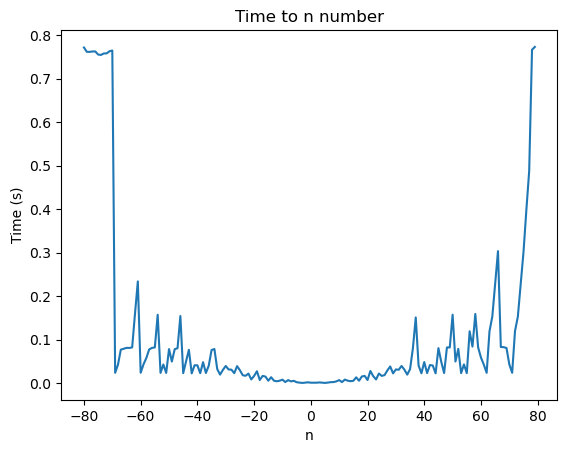

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

execution_time = []
input_sizes = list(range(-80, 80))

for n in input_sizes:
    execution_time.append(timeit.timeit(lambda: get_str_brute_force(n), number=1))

sns.lineplot(x=input_sizes, y=execution_time)

plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("Time to n number")

plt.show()

## Using Numpy

In [2]:
from itertools import permutations
import numpy as np

numbers = np.array(range(1, 10))
operations = np.array(["+", "-", "*", "/"])
operations_permutations = np.array(list(permutations(operations)))
# numbers_permutations = np.array(list(permutations(numbers, 5)))


def get_str_brute_force_np(value: int):
    selected = []

    for n1 in numbers:
        selected.append(n1)
        for n2 in numbers[~np.isin(numbers, selected)]:
          selected.append(n2)
          for n3 in numbers[~np.isin(numbers, selected)]:
            selected.append(n3)
            for n4 in numbers[~np.isin(numbers, selected)]:
              selected.append(n4)
              for n5 in numbers[~np.isin(numbers, selected)]:
                for op1, op2, op3, op4 in operations_permutations:
                  result = (
                    f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"
                  )

                  if eval(result) == value:
                    return result

              selected.remove(n4)
            selected.remove(n3)
          selected.remove(n2)
        selected.remove(n1)

    # for n1, n2, n3, n4, n5 in numbers_permutations:
    #     for op1, op2, op3, op4 in operations_permutations:
    #         result = f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"
    #         if eval(result) == value:
    #             return result

    return None


res = get_str_brute_force_np(32)
print(res)

1+5*7-8/2


In [3]:
test_set = list(range(-69, 77))

results = [(x, get_str_brute_force_np(x)) for x in test_set]

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 0 []
possible 146 [(-69, '1+4/2-8*9'), (-68, '1+6/2-8*9'), (-67, '2/1+3-8*9'), (-66, '2/1+4-8*9'), (-65, '2/1+5-8*9'), (-64, '2/1+6-8*9'), (-63, '2/1+7-8*9'), (-62, '3/1+7-8*9'), (-61, '4/1+7-8*9'), (-60, '1+4/2-7*9'), (-59, '1+6/2-7*9'), (-58, '1-7*9+8/2'), (-57, '2/1+4-7*9'), (-56, '2/1+5-7*9'), (-55, '2/1+6-7*9'), (-54, '3/1+6-7*9'), (-53, '1+4/2-7*8'), (-52, '1+6/2-7*8'), (-51, '1+4/2-6*9'), (-50, '2/1+4-7*8'), (-49, '1-6*9+8/2'), (-48, '2/1+4-6*9'), (-47, '2/1+5-6*9'), (-46, '3/1+5-6*9'), (-45, '1+4/2-6*8'), (-44, '1-6*8+9/3'), (-43, '2/1+3-6*8'), (-42, '1+4/2-5*9'), (-41, '1-5*9+6/2'), (-40, '1-5*9+8/2'), (-39, '1+4/2-6*7'), (-38, '1-6*7+9/3'), (-37, '1+4/2-5*8'), (-36, '1-5*8+6/2'), (-35, '2/1+3-5*8'), (-34, '2/1+4-5*8'), (-33, '1-4*9+6/3'), (-32, '1+3-8/2*9'), (-31, '1+4-8/2*9'), (-30, '1-5*7+8/2'), (-29, '1-4*8+6/3'), (-28, '1-4*8+6/2'), (-27, '1+4/2-5*6'), (-26, '1-5*6+9/3'), (-25, '1-4*7+6/3'), (-24, '1+3-7/2*8'), (-23, '1+3-6/2*9'), (-22, '1-3*9+8/2'), (-21, '1

## Using SA (Heuristic)

In [29]:
import random
import math

numbers = list(range(1, 10))
operations = ["+", "-", "*", "/"]


def is_expression_valid(exp: str, num: int) -> bool:
    return eval(exp) == num


def get_distance(exp: str, num: int) -> int:
    return abs(eval(exp) - num)


def join_nums_and_ops(nums: list, ops: list) -> str:
    res = ""

    for i in range(4):
        res += str(nums[i]) + ops[i]

    return res + str(nums[-1])


def get_closest(res: str) -> str:
    i, j = random.sample(range(1, len(res), 2), 2)
    # nums = {int(res[i]) for i in range(0, len(res), 2)}
    # res_nums = set(numbers) - nums

    # numI = random.sample(range(len(nums)), 2)

    # print(nums, res_nums)

    res_list = list(res)

    nums = [int(x) for x in res_list[::2]]
    ops = res_list[1::2]

    # swap operators
    i, j = random.sample(range(len(ops)), 2)
    ops[i], ops[j] = ops[j], ops[i]

    i, j = random.sample(range(len(nums)), 2)
    res_nums = list(set(numbers) - set(nums))
    rand_nums = random.sample(res_nums, 2)
    nums[i], nums[j] = rand_nums

    return join_nums_and_ops(nums, ops)


def probability(temp: int, dist: int) -> bool:
    return random.random() < math.exp(-1 * dist / temp)


def dec_temp(temp: int) -> int:
    return temp * 0.9


def create_exp() -> str:
    nums = random.sample(numbers, 5)
    ops = random.sample(operations, 4)

    return join_nums_and_ops(nums, ops)


def get_exp_SA(n: int, temp=10000000) -> list:
    curr_res = create_exp()
    curr_res_dist = get_distance(curr_res, n)

    best_res = curr_res
    best_rest_dist = curr_res_dist

    N = 0
    while temp > 0.0001:
        N += 1

        closest = get_closest(curr_res)
        closest_dist = get_distance(closest, n)

        # we already found the solution
        if(best_rest_dist == 0):
            return best_res

        if closest_dist < best_rest_dist:
            best_res = closest
            best_rest_dist = closest_dist

        if closest_dist < curr_res_dist or probability(
            temp, abs(curr_res_dist - closest_dist)
        ):
            curr_res = closest
            curr_res_dist = closest_dist

        temp = dec_temp(temp)

    return best_res


number = 20
result = get_exp_SA(number)
print(result)
print(is_expression_valid(result, number))

7/1-2+5*3
True
20.333333333333332


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

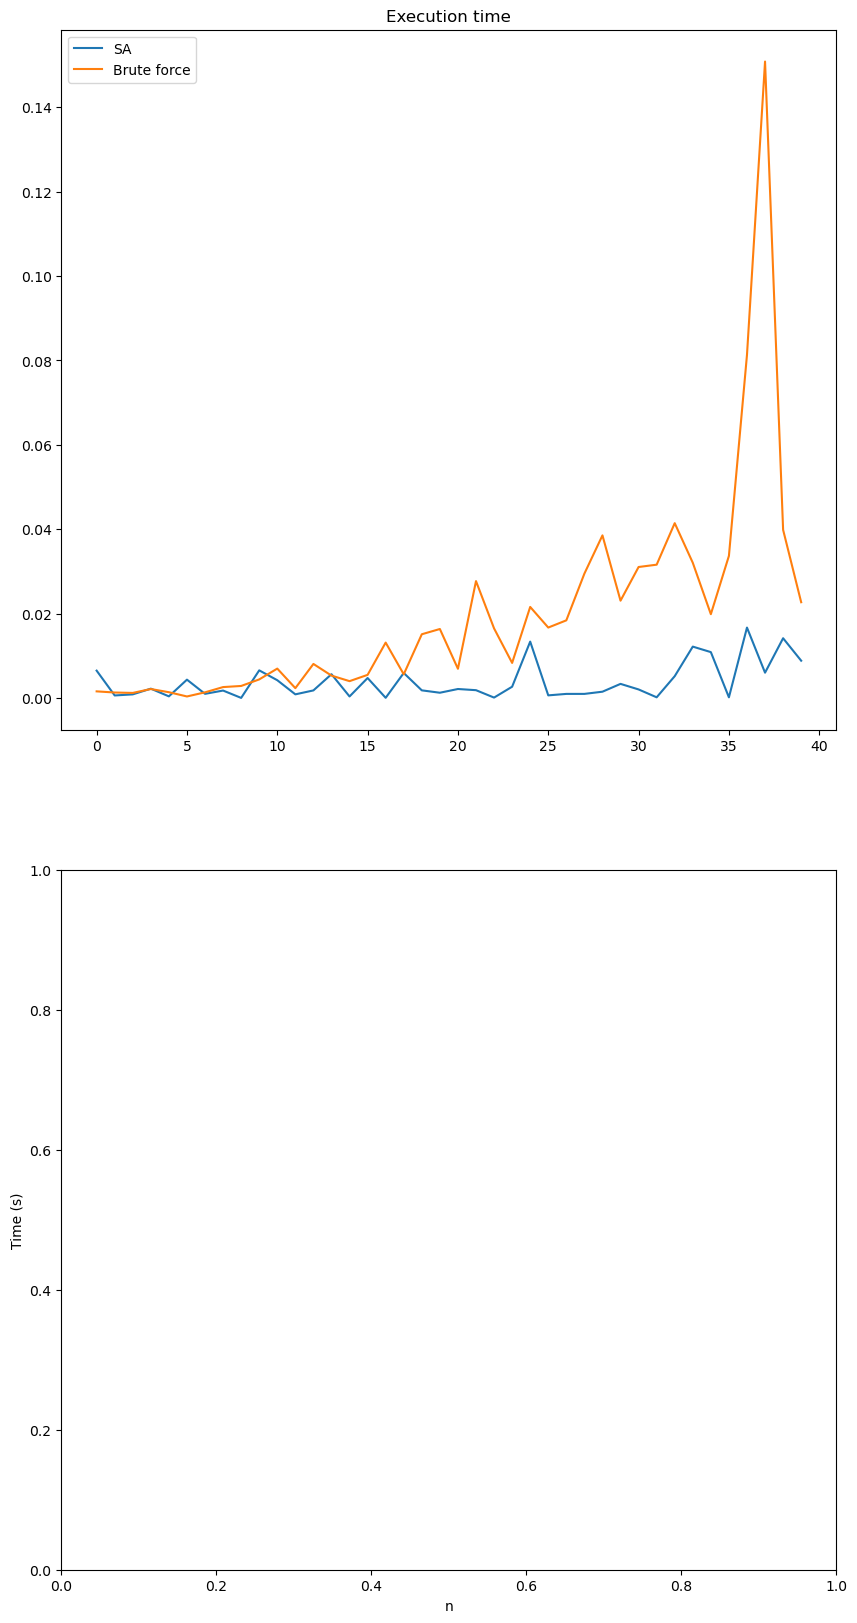

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
import time


execution_time_sa = []
execution_time_bf = []
results_sa = []
results_bf = []
# input_sizes = list(range(-80, 80))
input_sizes = list(range(0, 40))

for n in input_sizes:
    start_time = time.time()
    exp = get_exp_SA(n)
    execution_time_sa.append(time.time() - start_time)
    results_sa.append(is_expression_valid(exp, n))
    
    start_time = time.time()
    exp = get_str_brute_force(n)
    execution_time_bf.append(time.time() - start_time)
    results_bf.append(is_expression_valid(exp, n) if exp else False)

fig, axes = plt.subplots(2, 1, figsize=(10, 20))

sns.lineplot(x=input_sizes, y=execution_time_sa, label="SA", ax=axes[0])
sns.lineplot(x=input_sizes, y=execution_time_bf, label="Brute force", ax=axes[0])
axes[0].set_title("Execution time")

# sns.barplot(x=['Valid', 'Invalid'], y=[results_sa.count(True), results_sa.count(False)], label="SA", ax=axes[1])
# sns.barplot(x=['Valid', 'Invalid'], y=[results_bf.count(True), results_bf.count(False)], label="Brute force", ax=axes[1])
# axes[0].set_title("Valid invalid")

plt.xlabel("n")
plt.ylabel("Time (s)")

plt.show()